# Objectives:
Students Performance in Exams
Marks secured by the students in various subjects

# Step 1 :  Import Library and Dataset

In [63]:
import pandas as pd
import numpy as np

In [64]:
std = pd.read_csv(r"C:\Users\suvar\Desktop\Decision tree\exams.csv")
std


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,male,group C,high school,standard,none,73,70,65
996,male,group D,associate's degree,free/reduced,completed,85,91,92
997,female,group C,some high school,free/reduced,none,32,35,41
998,female,group C,some college,standard,none,73,74,82


In [65]:
std.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [73]:
std.columns=['race/ethnicity','parentallevelofeducation','lunch','testpreparationcourse','mathscore','readingscore','writingscore']
std.columns

Index(['race/ethnicity', 'parentallevelofeducation', 'lunch',
       'testpreparationcourse', 'mathscore', 'readingscore', 'writingscore'],
      dtype='object')

# Step 2 : Data Pre-Processing

### Univariate Analysis

In [74]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race/ethnicity            1000 non-null   object
 1   parentallevelofeducation  1000 non-null   object
 2   lunch                     1000 non-null   object
 3   testpreparationcourse     1000 non-null   object
 4   mathscore                 1000 non-null   int64 
 5   readingscore              1000 non-null   int64 
 6   writingscore              1000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [75]:
std.describe()

,mathscore,readingscore,writingscore
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


### Removing Irrelavent Variable


In [76]:
std = std.drop(['race/ethnicity'],axis=1)
std.columns

Index(['parentallevelofeducation', 'lunch', 'testpreparationcourse',
       'mathscore', 'readingscore', 'writingscore'],
      dtype='object')

In [77]:
std['writingscore'] =std["writingscore"].replace(" ",np.nan).astype(float) 


In [78]:
std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   parentallevelofeducation  1000 non-null   object 
 1   lunch                     1000 non-null   object 
 2   testpreparationcourse     1000 non-null   object 
 3   mathscore                 1000 non-null   int64  
 4   readingscore              1000 non-null   int64  
 5   writingscore              1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


### Checking Missing Value

In [79]:
std.isna().sum()

parentallevelofeducation    0
lunch                       0
testpreparationcourse       0
mathscore                   0
readingscore                0
writingscore                0
dtype: int64

In [80]:
std.writingscore.fillna(std.writingscore.mean(),inplace=True) 


In [81]:
std.isna().sum()

parentallevelofeducation    0
lunch                       0
testpreparationcourse       0
mathscore                   0
readingscore                0
writingscore                0
dtype: int64

In [82]:
std.describe() # describe works for number by default 

,mathscore,readingscore,writingscore
count,1000.000000,1000.000000,1000.000000
mean,66.396000,69.002000,67.738000
std,15.402871,14.737272,15.600985
min,13.000000,27.000000,23.000000
25%,56.000000,60.000000,58.000000
50%,66.500000,70.000000,68.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [83]:
std.head()

,parentallevelofeducation,lunch,testpreparationcourse,mathscore,readingscore,writingscore
0,high school,standard,completed,67,67,63.0
1,some high school,free/reduced,none,40,59,55.0
2,some college,free/reduced,none,59,60,50.0
3,high school,standard,none,77,78,68.0
4,associate's degree,standard,completed,78,73,68.0


In [95]:
std.lunch.value_counts(ascending=False)

standard        652
free/reduced    348
Name: lunch, dtype: int64

In [96]:
652 + 348

1000

In [97]:
std.testpreparationcourse=std.testpreparationcourse.replace({'test preparetion course' : 'none'})

In [98]:
std.testpreparationcourse.value_counts()

none         665
completed    335
Name: testpreparationcourse, dtype: int64

# Churn Rate Analysis


In [101]:
import plotly.express as px

fig = px.pie(std,names='testpreparationcourse',color='testpreparationcourse',
             color_discrete_map={'completed':'red',
                                 'none':'green'})
fig.show()

# Trend Analysis

In [102]:
std.testpreparationcourse.value_counts()

none         665
completed    335
Name: testpreparationcourse, dtype: int64

In [103]:
665/335

1.9850746268656716

In [106]:
Churn_Customer= std[std["testpreparationcourse"] == "completed"]
Churn_Customer

,parentallevelofeducation,lunch,testpreparationcourse,mathscore,readingscore,writingscore
0,high school,standard,completed,67,67,63.0
4,associate's degree,standard,completed,78,73,68.0
7,some college,standard,completed,93,88,84.0
10,some college,standard,completed,99,83,85.0
11,high school,standard,completed,80,87,90.0
...,...,...,...,...,...,...
987,some college,standard,completed,78,78,74.0
989,some college,standard,completed,70,60,65.0
994,high school,free/reduced,completed,86,82,75.0
996,associate's degree,free/reduced,completed,85,91,92.0


In [109]:
fig = px.sunburst(Churn_Customer, path=["parentallevelofeducation","writingscore"])
fig.show()

C:\Users\suvar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\suvar\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



### Taking subset data of Number 


In [110]:
std.select_dtypes(include=[np.number]).columns.tolist()

['mathscore', 'readingscore', 'writingscore']

In [111]:
std_num = std[std.select_dtypes(include=[np.number]).columns.tolist()]
std_num.head(3)

,mathscore,readingscore,writingscore
0,67,67,63.0
1,40,59,55.0
2,59,60,50.0


### Taking subset data of Category 

In [112]:
std_dummies = std[std.select_dtypes(include=['object']).columns.tolist()]
std_dummies.head(3)

,parentallevelofeducation,lunch,testpreparationcourse
0,high school,standard,completed
1,some high school,free/reduced,none
2,some college,free/reduced,none


### Converting Quality Variable to Number

In [113]:
from sklearn.preprocessing import LabelEncoder
std_dummies=std_dummies.apply(LabelEncoder().fit_transform)
std_dummies.head(3)
# label in ascending order

,parentallevelofeducation,lunch,testpreparationcourse
0,2,1,0
1,5,0,1
2,4,0,1


### Combine to Dataset


In [114]:
std_combined = pd.concat([std_num,std_dummies],axis=1)

In [115]:
std_combined.head()

,mathscore,readingscore,writingscore,parentallevelofeducation,lunch,testpreparationcourse
0,67,67,63.0,2,1,0
1,40,59,55.0,5,0,1
2,59,60,50.0,4,0,1
3,77,78,68.0,2,1,1
4,78,73,68.0,0,1,0


# Step 3: Data Partition

In [116]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = std_combined.drop(['testpreparationcourse'],axis=1)
y = std_combined[['testpreparationcourse']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [117]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

?tree.DecisionTreeRegressor

# Step 5: Plotting the Tree 


# Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [119]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,testpreparationcourse,mathscore,readingscore,writingscore,parentallevelofeducation,lunch
806,1,57,71,71.0,0,0
545,0,84,71,76.0,0,1
792,0,68,75,73.0,4,1
827,1,70,84,78.0,0,0
367,1,64,67,64.0,5,1


In [120]:
independent_variable = list(train.columns[1:])
independent_variable

['mathscore',
 'readingscore',
 'writingscore',
 'parentallevelofeducation',
 'lunch']

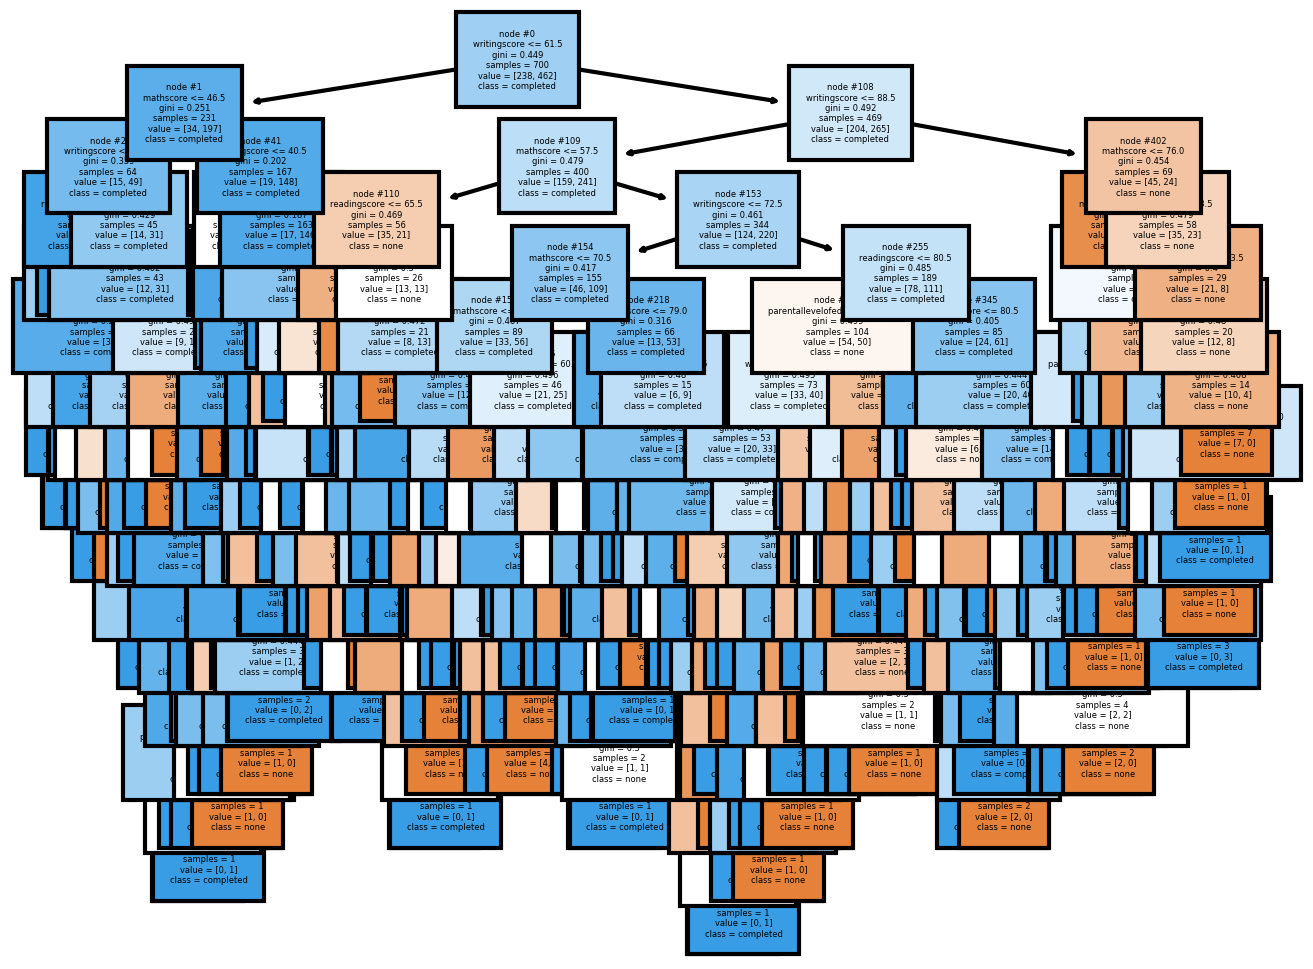

In [121]:
from sklearn import tree
import matplotlib.pyplot as plt

testpreparationcourse=['none', 'completed']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=testpreparationcourse, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Step 6 : Predictions on Train Dataset


In [122]:
train.head()

,testpreparationcourse,mathscore,readingscore,writingscore,parentallevelofeducation,lunch
806,1,57,71,71.0,0,0
545,0,84,71,76.0,0,1
792,0,68,75,73.0,4,1
827,1,70,84,78.0,0,0
367,1,64,67,64.0,5,1


In [123]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,testpreparationcourse,mathscore,readingscore,writingscore,parentallevelofeducation,lunch,Predicted
806,1,57,71,71.0,0,0,1
545,0,84,71,76.0,0,1,0
792,0,68,75,73.0,4,1,0
827,1,70,84,78.0,0,0,1
367,1,64,67,64.0,5,1,1


# Step 7 : Model Performance Metrics

In [125]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['testpreparationcourse'])
print(matrix)

[[238   0]
 [  0 462]]


#### Final accuracy of Model Before Pruning 


In [127]:
Accuracy_Train=((238+462)/(700)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [128]:
from sklearn.metrics import classification_report
print(classification_report(train['testpreparationcourse'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00       462

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700



### Model Improvement by Pruning Method ( Cut Tree)


In [129]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

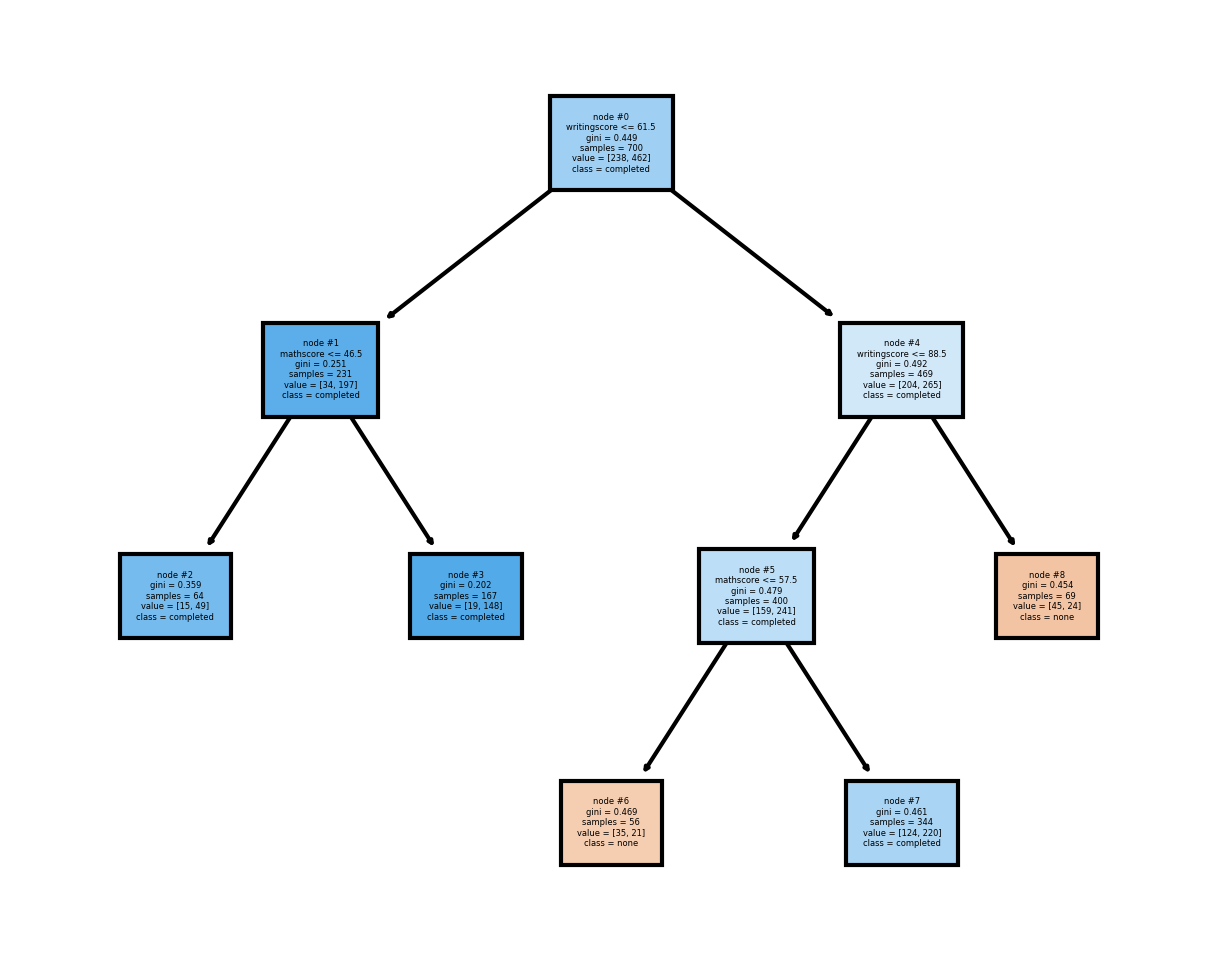

In [131]:
from sklearn import tree
import matplotlib.pyplot as plt

testpreparationcourse=['none', 'completed']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=testpreparationcourse, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

In [132]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,testpreparationcourse,mathscore,readingscore,writingscore,parentallevelofeducation,lunch,Predicted
806,1,57,71,71.0,0,0,0
545,0,84,71,76.0,0,1,1
792,0,68,75,73.0,4,1,1
827,1,70,84,78.0,0,0,1
367,1,64,67,64.0,5,1,1


In [133]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['testpreparationcourse'])
print(matrix)

[[ 80  45]
 [158 417]]


In [134]:
Accuracy_Train=((80+417)/(700)*100)
print(Accuracy_Train)

71.0


In [135]:
from sklearn.metrics import classification_report
print(classification_report(train['testpreparationcourse'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.64      0.34      0.44       238
           1       0.73      0.90      0.80       462

    accuracy                           0.71       700
   macro avg       0.68      0.62      0.62       700
weighted avg       0.70      0.71      0.68       700



In [136]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,mathscore,readingscore,writingscore,parentallevelofeducation,lunch,testpreparationcourse
110,79,88,86.0,4,1,0
637,64,67,68.0,4,1,1
87,97,93,88.0,4,1,1
428,55,52,47.0,0,0,1
672,34,47,45.0,5,0,1


In [137]:
test['Predicted']=dt.predict(X_test)
test.head()

,mathscore,readingscore,writingscore,parentallevelofeducation,lunch,testpreparationcourse,Predicted
110,79,88,86.0,4,1,0,1
637,64,67,68.0,4,1,1,1
87,97,93,88.0,4,1,1,1
428,55,52,47.0,0,0,1,1
672,34,47,45.0,5,0,1,1


In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['testpreparationcourse'])
print(confusion_matrix)

[[ 32  18]
 [ 65 185]]


In [139]:
Accuracy_test=((32+185)/(300)*100)
Accuracy_test

72.33333333333334

In [140]:
from sklearn.metrics import classification_report
print(classification_report(train['testpreparationcourse'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.64      0.34      0.44       238
           1       0.73      0.90      0.80       462

    accuracy                           0.71       700
   macro avg       0.68      0.62      0.62       700
weighted avg       0.70      0.71      0.68       700



In [142]:
97*.89

86.33

In [143]:
from sklearn.metrics import classification_report
print(classification_report(test['testpreparationcourse'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.64      0.33      0.44        97
           1       0.74      0.91      0.82       203

    accuracy                           0.72       300
   macro avg       0.69      0.62      0.63       300
weighted avg       0.71      0.72      0.69       300



In [144]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=50, ## child
                                 min_samples_split=200, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, min_samples_split=200)

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [100, 200,270], ## Parent 
           'min_samples_leaf': [50,70,80], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 70, 80],
                         'min_samples_split': [100, 200, 270]},
             verbose=1)

In [146]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=70, min_samples_split=100,
                       random_state=42)